<a href="https://colab.research.google.com/github/SeongeunKim-sonja/Keras_example_study_2023/blob/main/Computer_Vision/Simple_MNIST_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#단순한 MNIST CNN(합성곱 신경망) 

*이 문서는 keras 예제를 분석하여 해설을 작성한 것입니다.*

<br>[예제 페이지](https://keras.io/examples/vision/mnist_convnet/)
<br>
<br>

MNIST 데이터셋을 99%의 정확도로 분류 가능한 단순한 구조의 Convolution Neural Network를 구성해본다. 

#Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


#데이터 준비



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


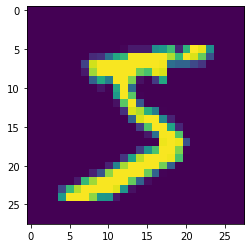

In [ ]:
# Model / data parameters
# 0~9까지의 숫자 손글씨 데이터 = 10개 클래스, 각각 가로세로 28px의 흑백 데이터
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
#데이터를 호출해 학습용 데이터와 실험용 데이터를 나눈다. 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#데이터 샘플
plt.imshow(x_train[0])


# Scale images to the [0, 1] range
# 흑백 이미지를 정규화한다. 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)   #축을 추가한한다. 
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#결과값을 one-hot encoding 해주는 함수 utils.to_categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#CNN 모델 생성

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]

)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

conv2d 레이어의 Parmeter 수는 다음에 의해서 결정된다.

**Parmeter 수 = (conv필터 가로 x 세로 x 데이터 깊이 + bias 1개) x 필터 수**

ex) 

conv2d_2 Layer의 경우 - (3 x 3 x 1 + 1) x 32 = 320

conv2d_3 Layer의 경우 - (3 x 3 x 32 + 1) x 64 =  18496

#모델 학습

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#여러 카테고리를 분류하니까 + one-hot 인코딩이므로 
#loss function 은 categorical_crossentropy, 
#모델 마지막 레이어의 activation function 은 softmax
# categorical_crossentropy 와 sparse_categorical_crossentropy(정수 형태) 와 비교하여 기억하자 

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#validation_split 설정시 그만큼의 데이터를 검증용으로 쓰겠다는 것을 의미한다. 

Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.0322 - val_accuracy: 0.9927
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0290 - val_accuracy: 0.9922
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0313 - val_accuracy: 0.9920
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0287 - val_accuracy: 0.9922
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.0269 - val_accuracy: 0.9932
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0266 - val_accuracy: 0.9928
Epoch 

#학습한 모델 평가

Test loss: 0.02343999408185482
Test accuracy: 0.9926999807357788


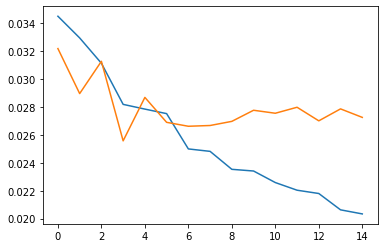

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

In [ ]:
#테스트 데이터로 실제 예픅을 해본다. 
y_ = model.predict(x_test)
print(y_)

#argmax 로 가장 예측값이 높게 나온 원소를 추출하여 확인할 수 있다.
predicted = np.argmax(y_, axis=1)
print(predicted)

313/313 [==============================] - 0s 2ms/step
[[4.4101428e-12 5.3346701e-14 1.7105970e-07 ... 9.9999976e-01
  2.9858882e-10 1.6627581e-08]
 [1.2994208e-08 2.3170779e-08 9.9999988e-01 ... 2.5046676e-14
  1.6113869e-10 1.8339775e-15]
 [3.1702712e-09 9.9987197e-01 8.2889125e-07 ... 1.8877032e-05
  1.7857531e-06 3.3270972e-08]
 ...
 [3.5583375e-16 7.3744188e-12 4.0995039e-13 ... 1.8028206e-08
  7.5007540e-07 2.8476835e-08]
 [1.0450630e-08 4.9849117e-18 1.4639337e-11 ... 4.4052696e-16
  5.0022813e-06 3.9344613e-12]
 [2.2010626e-07 2.4351479e-13 1.9197753e-07 ... 5.7923955e-14
  1.1503744e-06 1.9880996e-11]]
[7 2 1 ... 4 5 6]


7


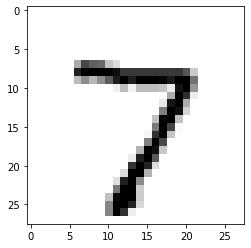

2


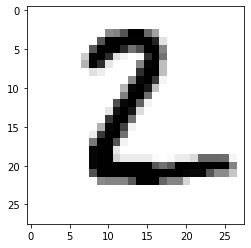

1


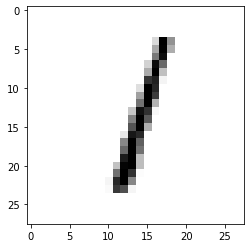

0


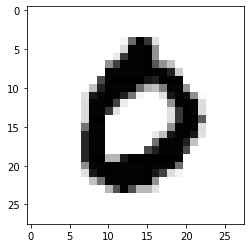

4


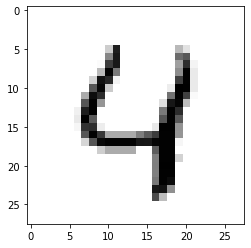

In [ ]:
#시각화 하여 확인하기 , imshow 에는 cmap=plt.cm.binary 옵션을 주어 흑백으로 처리하였다. 
for i in range (5):
   print(predicted[i])
   plt.imshow(x_test[i].squeeze(), cmap=plt.cm.binary)
   plt.show()  